In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
from qiskit.circuit.library import Permutation

#import numpy as np


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

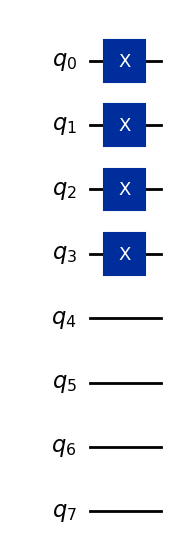

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(8)   #N = 8 qubits. N=8 classical bits

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.draw("mpl")

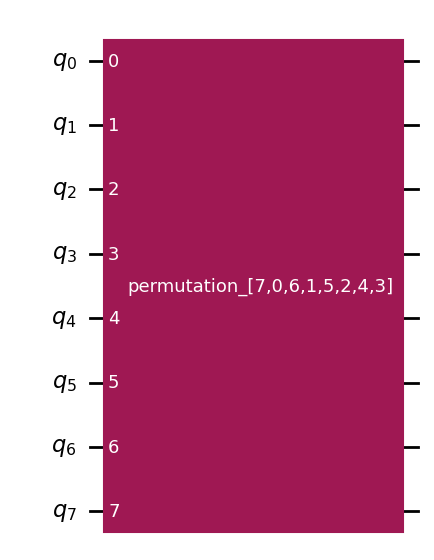

In [4]:
qcp = Permutation(num_qubits = 8, pattern = [7,0,6,1,5,2,4,3]) ####Permutation with defined pattern 7, 0, 6, 1, 5, 2, 4, 3

qcp.draw("mpl")

#c = ClassicalRegister(8, 'c')

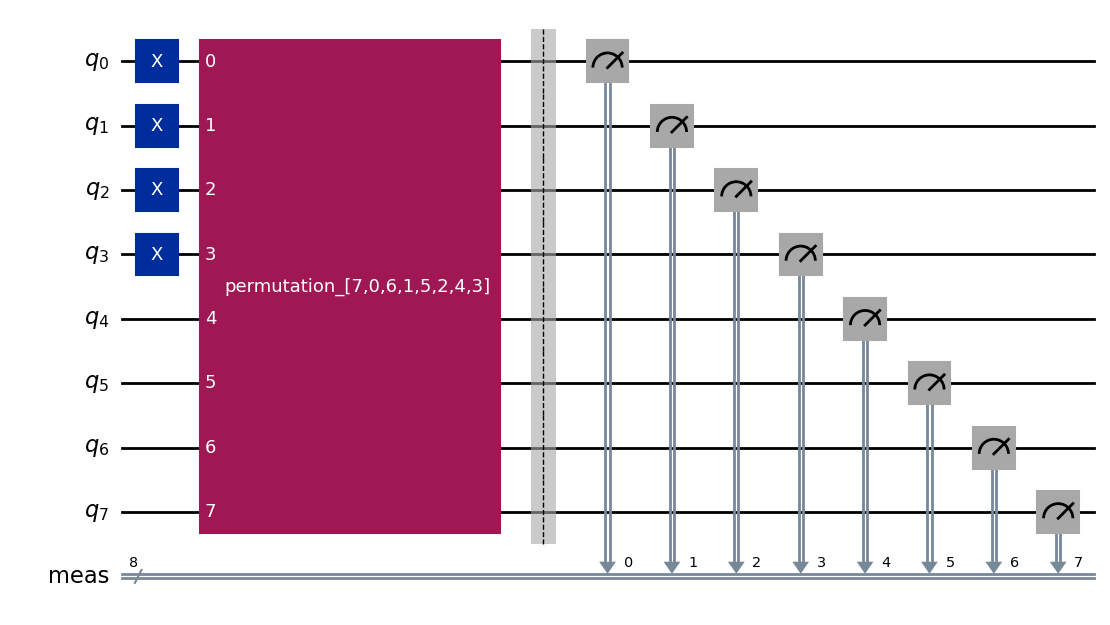

In [5]:
#Adding circuits 
qc = qc.compose(qcp)

qc.measure_all()

qc.draw("mpl")


####Permutation with pattern 7, 0, 6, 1, 5, 2, 4, 3

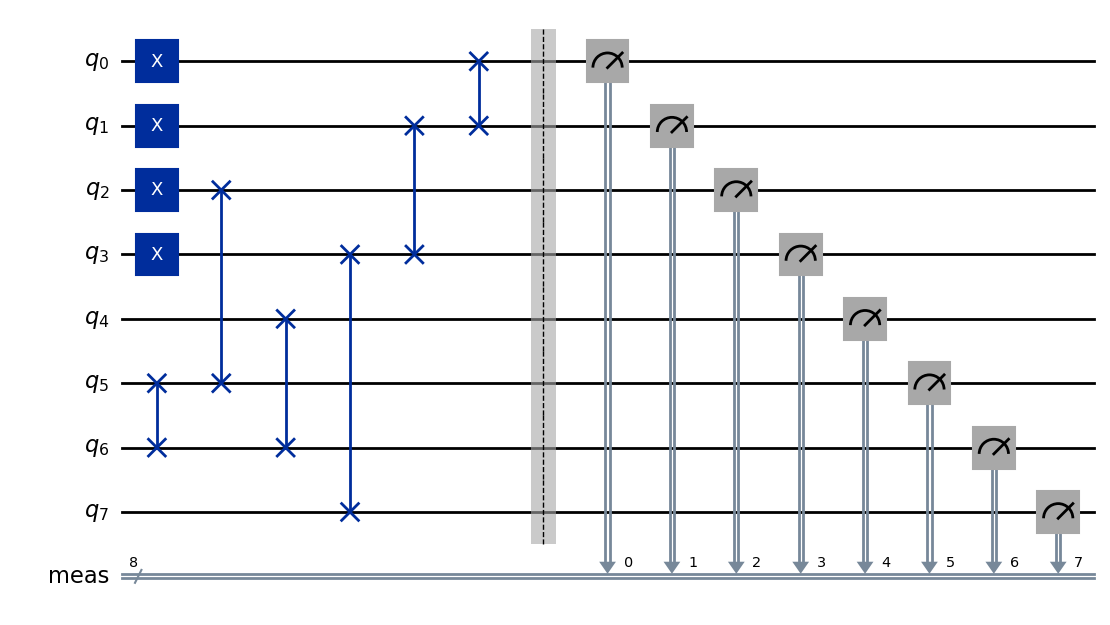

In [6]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [7]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)



#job = execute(circuit, backend, shots=100)

RESULT  {'10101010': 1000}


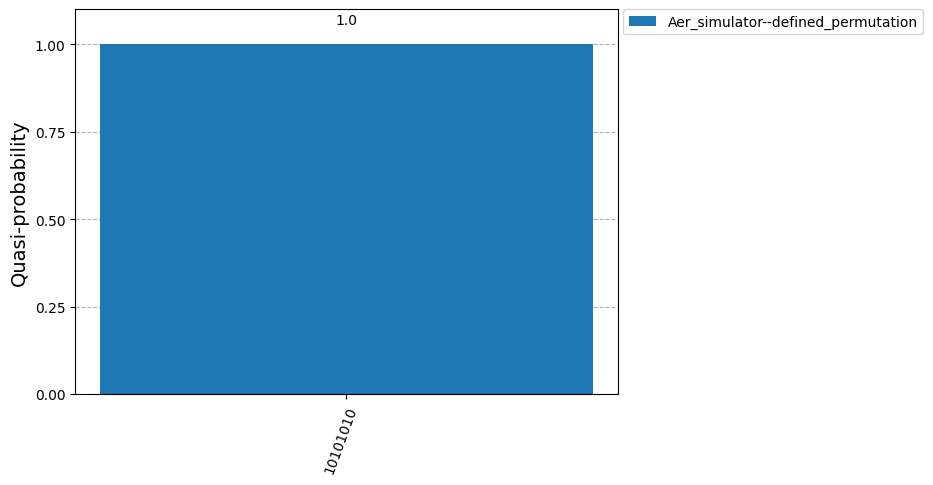

In [8]:
plot_distribution([counts], legend = ['Aer_simulator--defined_permutation'])


Random Permutation Circuit

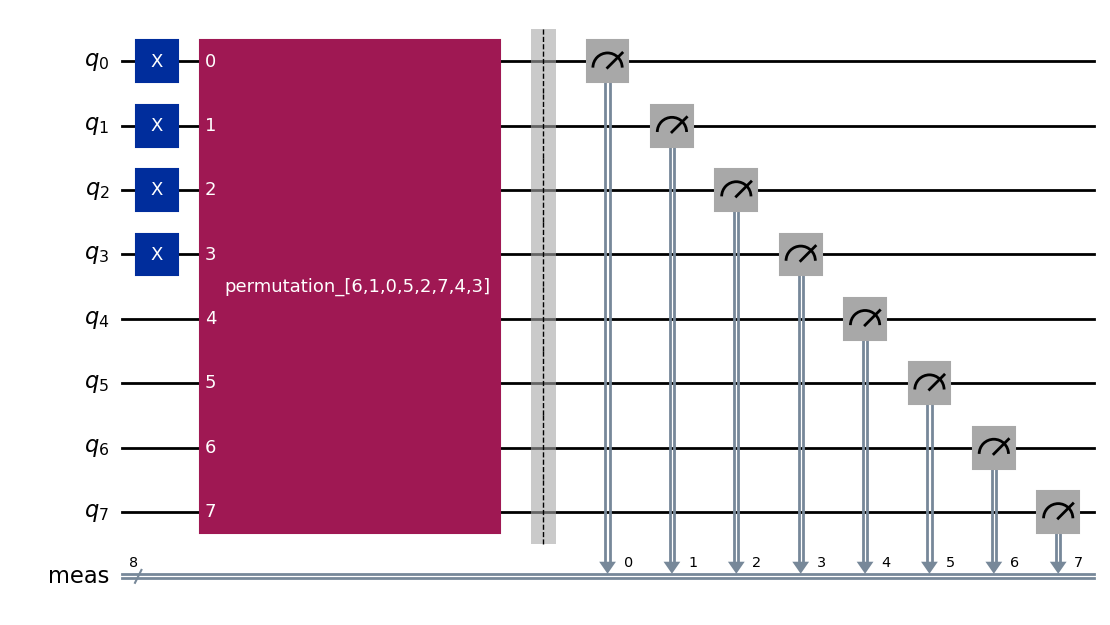

In [9]:

#initializing  quantum circuit
qc = QuantumCircuit(8)   #N = 8 qubits. N=8 classical bits


qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qcp = Permutation(num_qubits = 8)  #I did not defined the permutations. Thus they are random

qc = qc.compose(qcp)

qc.measure_all()

qc.draw("mpl")


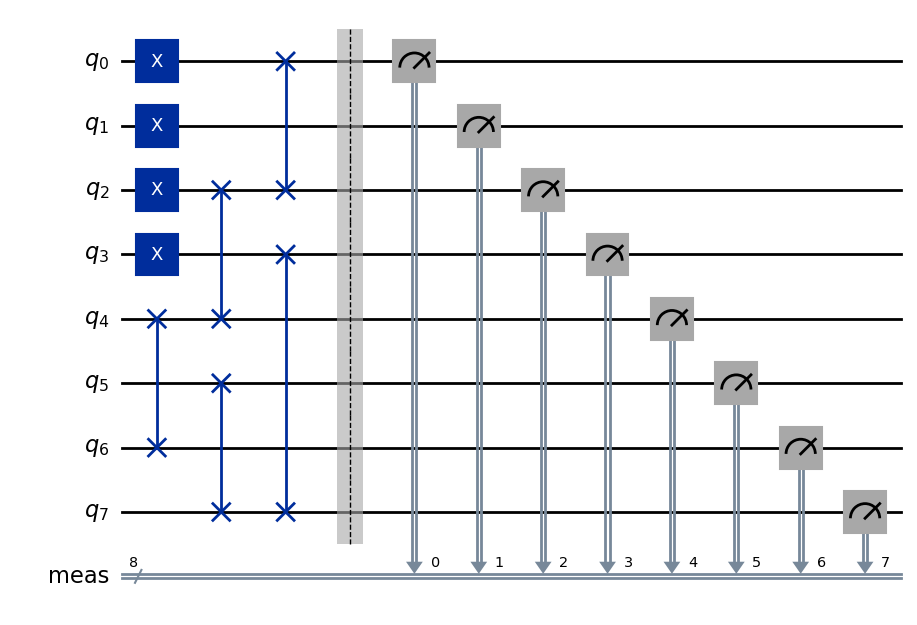

In [10]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [11]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. 
#counts
print('RESULT ', counts)


RESULT  {'10010110': 1000}


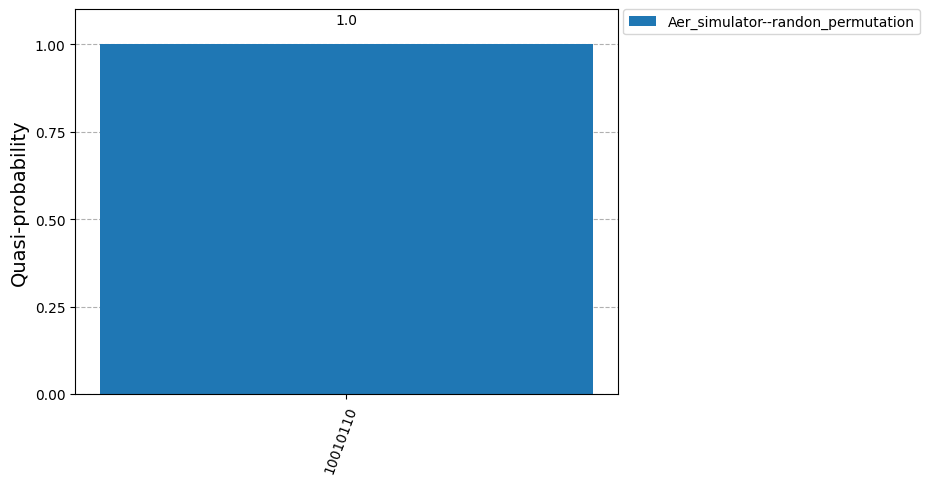

In [12]:

plot_distribution([counts], legend = ['Aer_simulator--randon_permutation'])